# Project 2 - Ames Housing Data and Kaggle Challenge

### Contents

- [Problem Statement](#Problem-Statement)
- [Importing](#Importing)
- [Functions](#Functions)
- [Inspect Data](#Inspect-Data)
- [Clean Data](#Clean-Data)
- [Output Clean Data](#Output-Clean-Data)
- [Prepare Data](#Prepare-Data)
- [EDA](#EDA)
- [Pre-Modelling](#Pre-Modelling)
- [LR Model Exploratory](#LR-Model-Exploratory)
- [Create Feature Matrix and Target](#Create-Feature-Matrix-and-Target)
- [LR Model Polynomial](#LR-Model-Polynomial)
- [LR Model](#LR-Model)
- [Ridge Model](#Ridge-Model)
- [Lasso Model](#Lasso-Model)
- [Output Model Predictions](#Output-Model-Predictions)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

### Problem Statement

- To analyze the Ames Housing Dataset from the Ames Assessor’s Office.
- The dataset contains information on residential properties sold in Ames (Iowa) from 2006 to 2010.
- To develop a regression model to predict the sale prices of houses.
- The model will be used by real estate agents to predict house prices.
- Recommendations will provide insights for homeowners to increase house prices through home improvements.

### Importing

In [1]:
# user configuration

# toggle to create models with/without outliers
remove_outliers_flag = True

# toggle to output predictions to csv
output_predictions_flag = True

In [2]:
# import libraries

# maths
import scipy.stats as stats
import numpy as np
import pandas as pd
#from pandas.api.types import is_numeric_dtype

# visual
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,Lasso,LassoCV,ElasticNet 
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error

# html
#from IPython.display import Image
#from IPython.core.display import HTML

# others
import datetime as dt
#import re
#import os

In [3]:
# import raw data
input_path = '../data/input/'

df_train = pd.read_csv(input_path + 'train.csv')
df_test = pd.read_csv(input_path + 'test.csv')

# convert column names
# define type e.g. dummy, scale
# feature selection
df_cols = pd.read_csv(input_path + 'columns.csv')

### Functions

In [87]:
def create_scatterplot(title,data,x,y,hue=None,xlabel=None,ylabel=None,size=None):    
        
    plt.figure(figsize=(20,12))
    
    sns.set_style("whitegrid")
    palette = sns.color_palette("bright",n_colors=16)
      
    #sns.regplot(data,x=x,y=y)        
    sns.scatterplot(data=data,x=x,y=y,hue=hue,palette=palette,size=size,sizes=(10, 200))

    #plt.xlim(min_x,max_x)
    #plt.ylim(min_x,max_x)
                    
    plt.title(title,fontsize=25)
    
    if xlabel == None:
        xlabel = x
    if ylabel == None:
        ylabel = y
    
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel(ylabel,fontsize=20)
    plt.tick_params(labelsize=15)

In [82]:
def create_boxplot(data,x,y,title=''):
    
    plt.figure(figsize=(20,12))
    
    b = sns.boxplot(data=data,x=x,y=y)
    b.axes.set_title(title,fontsize=25)
    b.set_xlabel(x,fontsize=20)
    b.set_ylabel(y,fontsize=20)
    b.tick_params(labelsize=15)

In [6]:
def create_lr_model(df,cols,cv=5):
    
    # create X (feature matrix) and y (target)
    X = df.loc[:,cols]
    X = X.values
    y = df['sale_price']
    
    # using holdout method
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=3050)
    
    model = lr.fit(X_train,y_train)
    print('coef: {} intercept: {}'.format(model.coef_,model.intercept_))

    score = model.score(X_test,y_test)
    print('score:',score)

    cvs = cross_val_score(model,X,y,cv=cv)    
    mean = np.mean(cvs)
    print('cvs:',mean,cvs)
    
    return model

In [ ]:
def rename_lot_subclass():
    
    

### Inspect Data

In [7]:
print(df_train.columns)

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [8]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


df_train_info = df_train.describe()
df_train_info

In [9]:
# Check for nulls in columns
null_cols = df_train.isnull().sum()
mask_null = null_cols > 0
null_cols[mask_null].sort_values(ascending=False)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Yr Blt      114
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Garage Area          1
Total Bsmt SF        1
dtype: int64

In [10]:
# Check for nulls in rows
null_rows = df_train.isnull().sum(axis=1)
mask_null = null_rows > 0
null_rows[mask_null].sort_values(ascending=False)

114     16
580     15
437     15
1327    15
2010    15
1594    15
1428    15
1098    14
700     14
256     14
276     12
1007    11
1049    11
737     11
514     11
1211    11
616     11
1372    11
334     11
1125    11
1464    10
1686    10
964     10
954     10
942     10
924     10
901     10
878     10
824     10
1799    10
        ..
1961     3
1844     3
1471     3
159      3
1989     2
761      2
657      2
1225     2
1246     2
149      2
424      2
1134     2
1635     2
29       2
1422     2
1679     2
1707     2
1373     2
1002     2
2032     2
107      2
1652     2
1130     2
110      2
1133     2
1405     2
1756     2
1759     2
52       1
974      1
Length: 2051, dtype: int64

In [11]:
df_train_info = df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [12]:
# find columns with the most empty cells
df_train.count(axis=0).sort_values()

Pool QC               9
Misc Feature         65
Alley               140
Fence               400
Fireplace Qu       1051
Lot Frontage       1721
Garage Finish      1937
Garage Qual        1937
Garage Cond        1937
Garage Yr Blt      1937
Garage Type        1938
Bsmt Exposure      1993
BsmtFin Type 2     1995
Bsmt Qual          1996
BsmtFin Type 1     1996
Bsmt Cond          1996
Mas Vnr Type       2029
Mas Vnr Area       2029
Bsmt Full Bath     2049
Bsmt Half Bath     2049
BsmtFin SF 1       2050
Garage Area        2050
BsmtFin SF 2       2050
Bsmt Unf SF        2050
Total Bsmt SF      2050
Garage Cars        2050
Bedroom AbvGr      2051
Half Bath          2051
Full Bath          2051
Kitchen AbvGr      2051
                   ... 
Lot Area           2051
Street             2051
Lot Shape          2051
Land Contour       2051
Utilities          2051
Lot Config         2051
Land Slope         2051
Neighborhood       2051
Condition 1        2051
Condition 2        2051
Bldg Type       

### Clean Data

In [13]:
# rename columns
df_train.columns = df_cols['new_name']
df_test.columns = df_cols['new_name'][0:-1]

In [14]:
# df_train: option to remove outliers
# df_test: do not remove outliers

if remove_outliers_flag == True:
    
    print('before:',len(df_train))
    
    mask_no_outliers = df_train['grd_total_area'] > 4000
    df_train = df_train[~mask_no_outliers]
    
    print('after:',len(df_train))

before: 2051
after: 2049


In [15]:
# convert all string in cells to lowercase -> prevent duplicates when creating dummies
df_train = df_train.applymap(lambda s:s.lower() if type(s) == str else s)
df_test = df_test.applymap(lambda s:s.lower() if type(s) == str else s)

In [16]:
# fill nan/empty cells with na
cols = ['pool_qual','bsmt_qual','fireplace_score','garage_qual','garage_cond','bsmt_type1_score','bsmt_type2_score']

for col in cols:
    df_train[col] = df_train[col].fillna(value='na')
    df_test[col] = df_test[col].fillna(value='na')

In [17]:
# fill nan/empty cells with 0
cols = ['bath_half_bsmt_num','bath_full_bsmt_num','garage_area','garage_car_num','bsmt_total_area',
        'bsmt_unfinish_area','bsmt_type2_area','bsmt_type1_area']

for col in cols:
    df_train[col] = df_train[col].fillna(value='0')
    df_test[col] = df_test[col].fillna(value='0')

In [18]:
df_train[cols].head()

new_name,bath_half_bsmt_num,bath_full_bsmt_num,garage_area,garage_car_num,bsmt_total_area,bsmt_unfinish_area,bsmt_type2_area,bsmt_type1_area
0,0,0,475,2,725,192,0,533
1,0,1,559,2,913,276,0,637
2,0,1,246,1,1057,326,0,731
3,0,0,400,2,384,384,0,0
4,0,0,484,2,676,676,0,0


In [19]:
df_test[cols].head()

new_name,bath_half_bsmt_num,bath_full_bsmt_num,garage_area,garage_car_num,bsmt_total_area,bsmt_unfinish_area,bsmt_type2_area,bsmt_type1_area
0,0,0,440,1,1020,1020,0,0
1,0,0,580,2,1967,1967,0,0
2,0,1,426,2,654,100,0,554
3,0,0,480,2,968,968,0,0
4,0,1,514,2,1394,785,0,609


### Output Clean Data

In [20]:
# output to csv

mid_path = '../data/mid/'

df_train.to_csv(mid_path + 'df_train_clean.csv')
df_test.to_csv(mid_path + 'df_test_clean.csv')

#df_corr.to_csv(mid_path + 'df_corr.csv')

### Prepare Data 

### EDA

In [21]:
# df_train heatmap
#fig, ax = plt.subplots(figsize=(20, 10))
#sns.heatmap(df_train.corr())

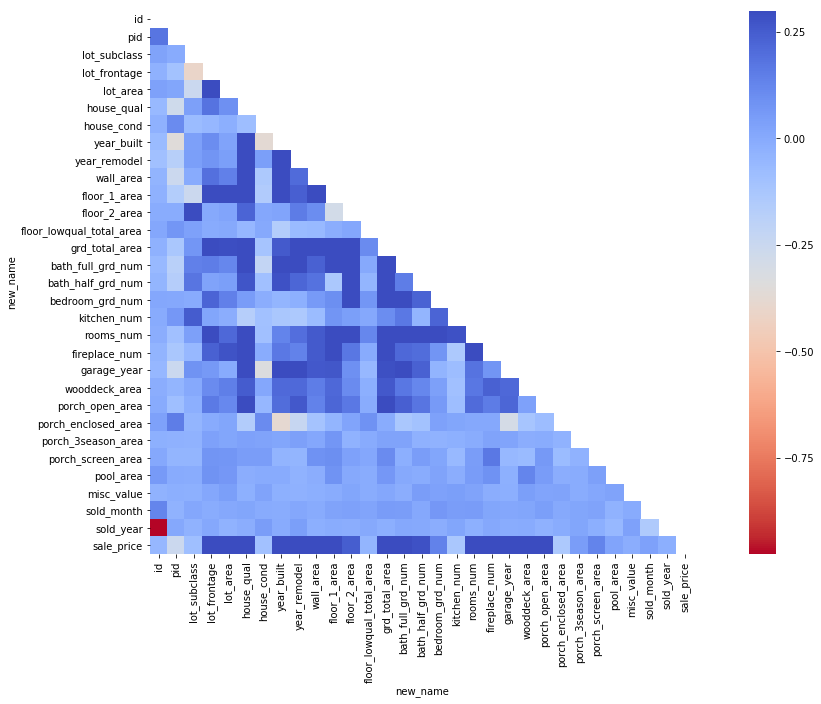

In [22]:
# df_train heatmap (staircase)
corr = df_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, mask=mask, vmax=.3, square=True,cmap="coolwarm_r")    

#with sns.axes_style("whitegrid"):
    #ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,cmap="RdBu")

In [23]:
# inspect correlation matrix
df_corr = df_train.corr()
print(df_corr.shape)
df_corr['sale_price'].sort_values(ascending=False)

(31, 31)


new_name
sale_price                  1.000000
house_qual                  0.803462
grd_total_area              0.719463
floor_1_area                0.648252
year_built                  0.572405
year_remodel                0.550872
bath_full_grd_num           0.538225
garage_year                 0.534514
wall_area                   0.520023
rooms_num                   0.509775
fireplace_num               0.473783
lot_frontage                0.355530
porch_open_area             0.338545
wooddeck_area               0.327629
lot_area                    0.303744
bath_half_grd_num           0.283372
floor_2_area                0.248826
bedroom_grd_num             0.137145
porch_screen_area           0.134555
porch_3season_area          0.048721
sold_month                  0.032508
pool_area                   0.025805
misc_value                 -0.010323
sold_year                  -0.015174
floor_lowqual_total_area   -0.041608
id                         -0.051416
lot_subclass               -0

sale price tends to increase as house quality increases.


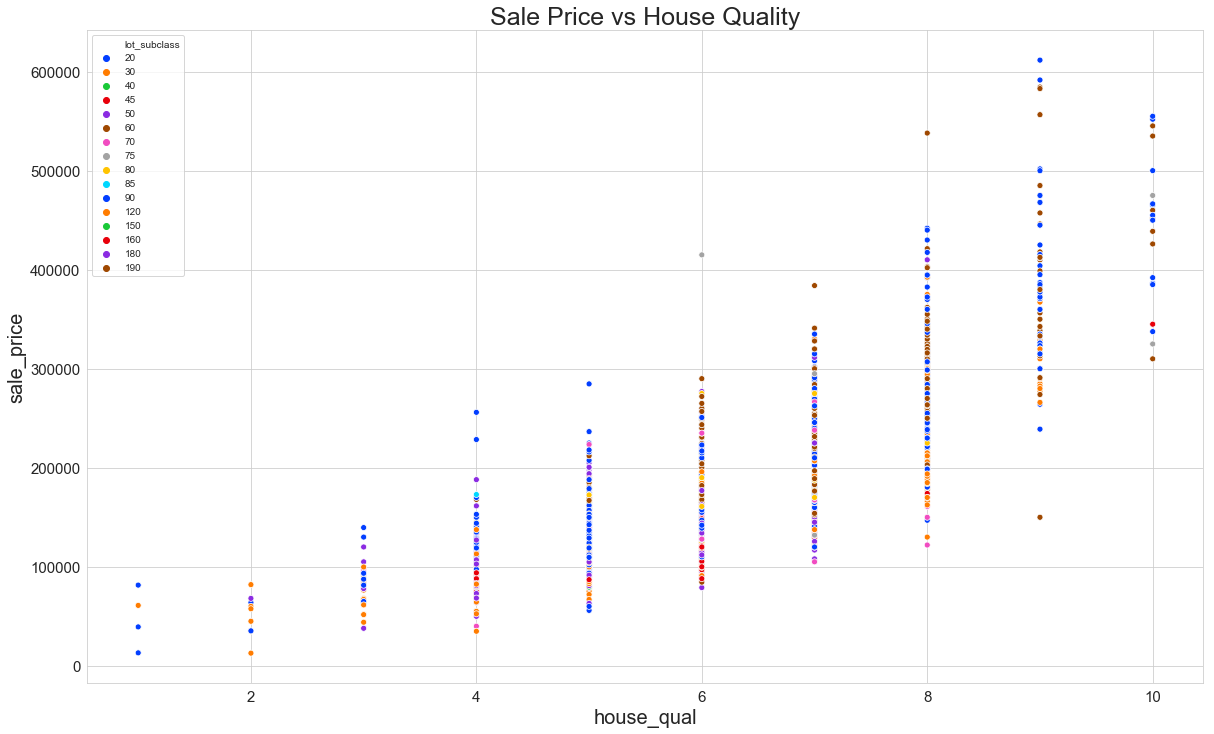

In [24]:
create_scatterplot('Sale Price vs House Quality',df_train,x ='house_qual',y ='sale_price',hue ='lot_subclass')

print("sale price tends to increase as house quality increases.")

plot histograms for all numeric columns to check for zeros and abnormalities.


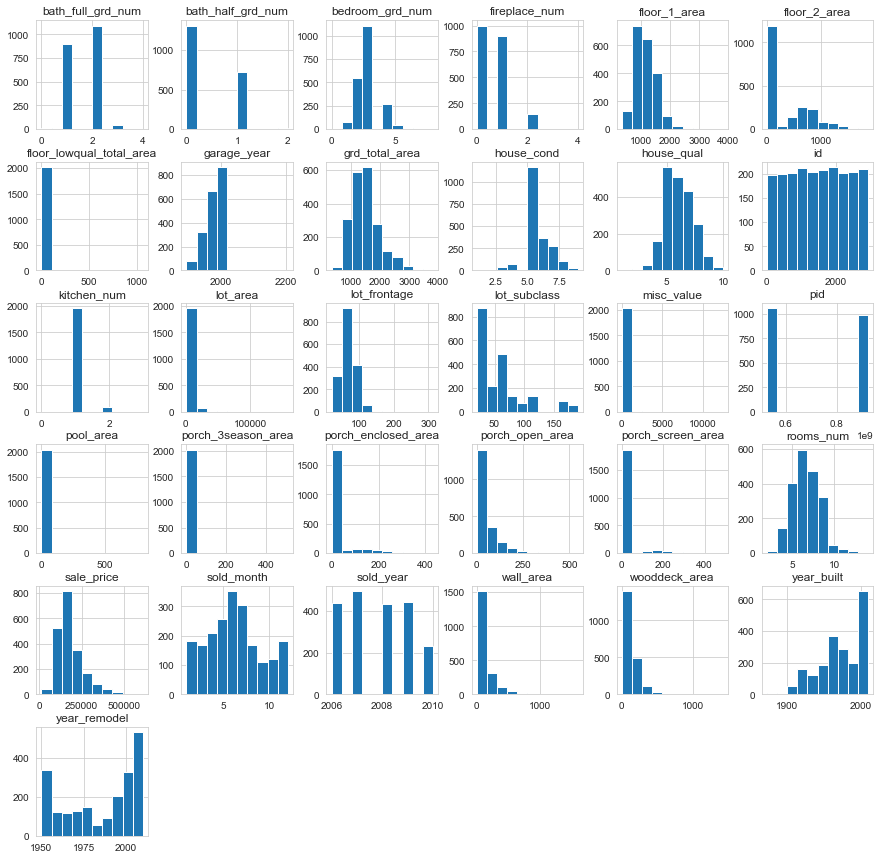

In [25]:
# create histograms for all numeric columns
df_train.hist(figsize=(15, 15));

print('plot histograms for all numeric columns to check for zeros and abnormalities.')

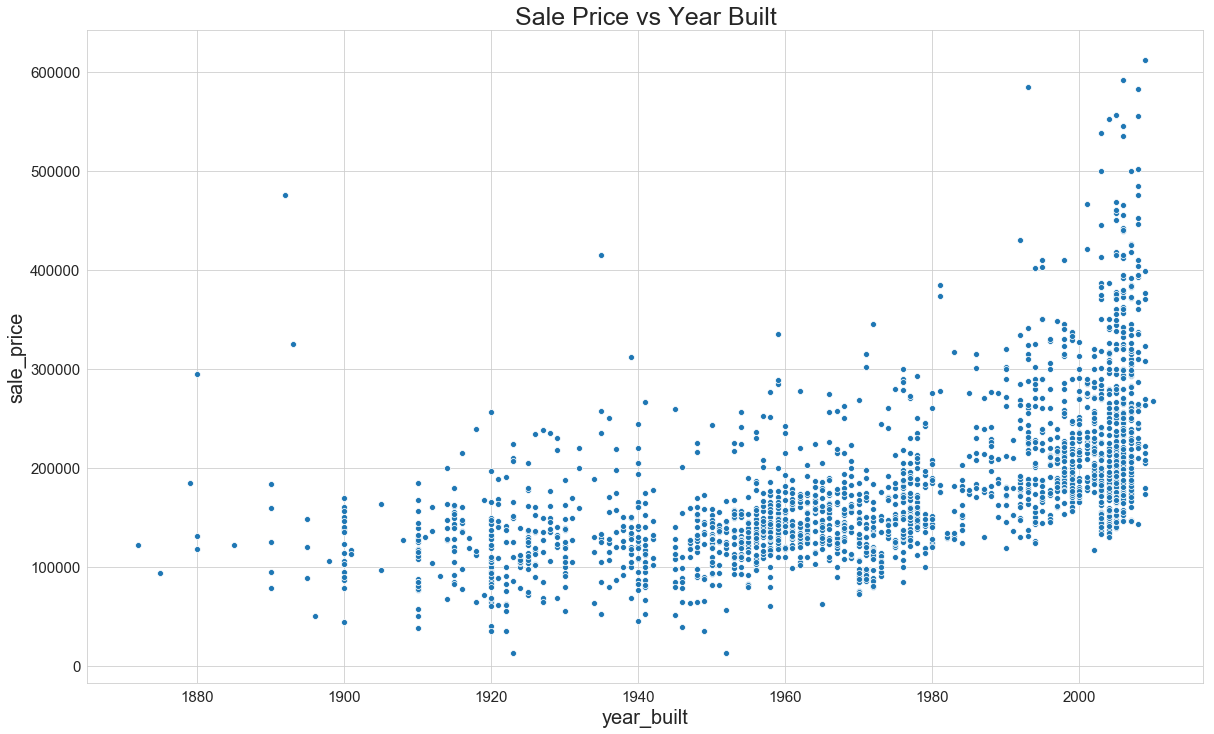

In [26]:
create_scatterplot('Sale Price vs Year Built',df_train,x='year_built',y='sale_price')

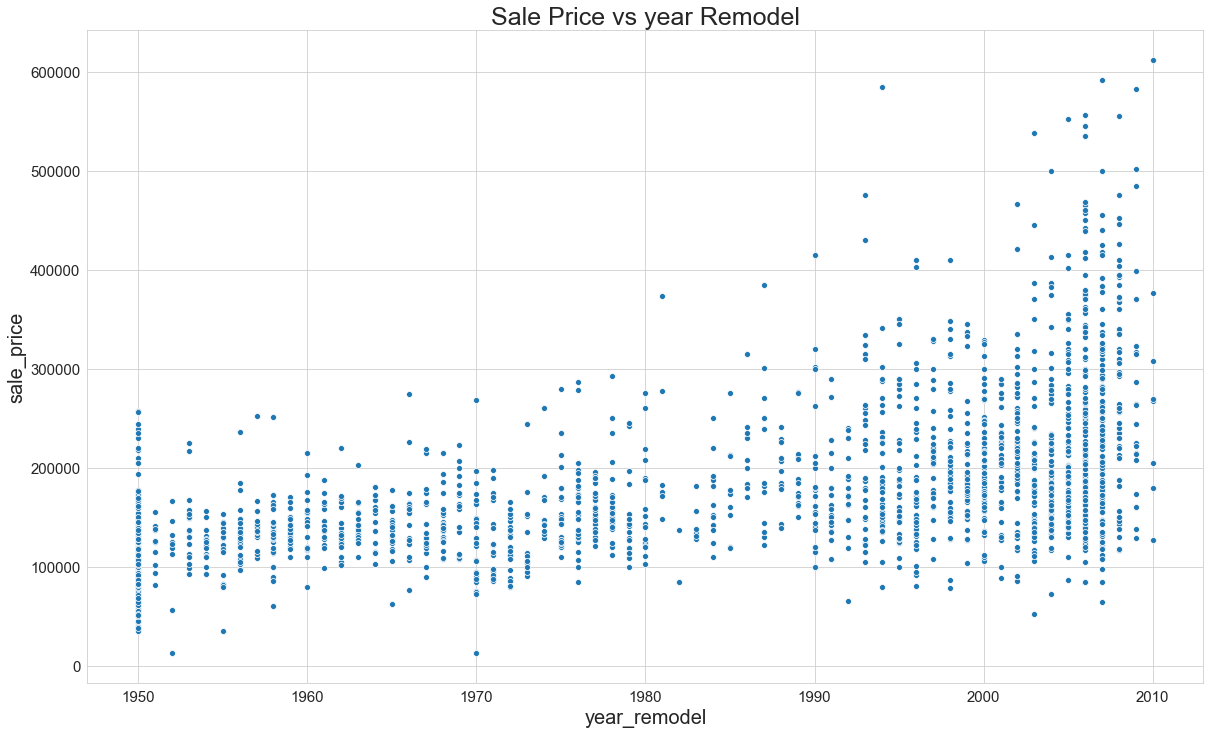

In [27]:
create_scatterplot('Sale Price vs year Remodel',df_train,x='year_remodel',y='sale_price')

Set remove_outliers_flag==True to show 2 outliers (bottom right)


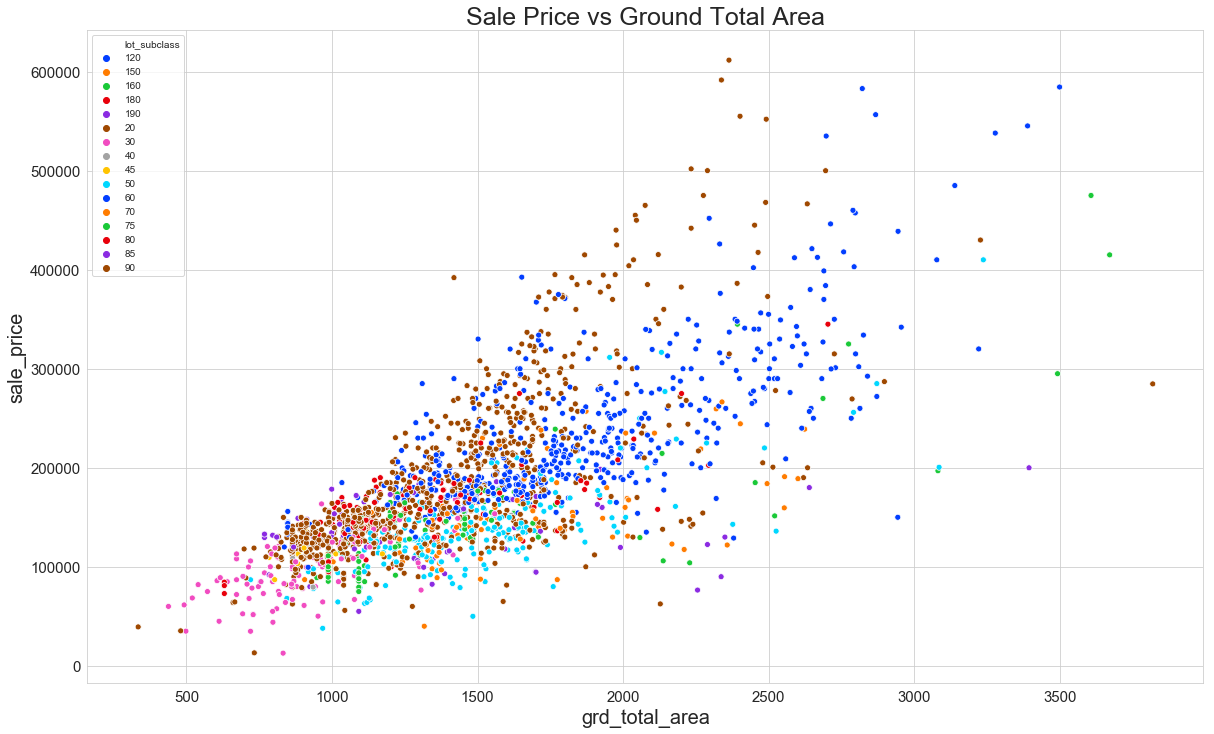

In [80]:
create_scatterplot('Sale Price vs Ground Total Area',df_train,x='grd_total_area',y='sale_price',hue='lot_subclass')

print('Set remove_outliers_flag==True to show 2 outliers (bottom right)')

In [29]:
#df_train['interact'] = df_train['bsmt_total_area'] * df_train['grd_total_area']

#df_train['interact'] = df_train['bsmt_total_area'] * df_train['grd_total_area'] * df_train['floor_1_area']

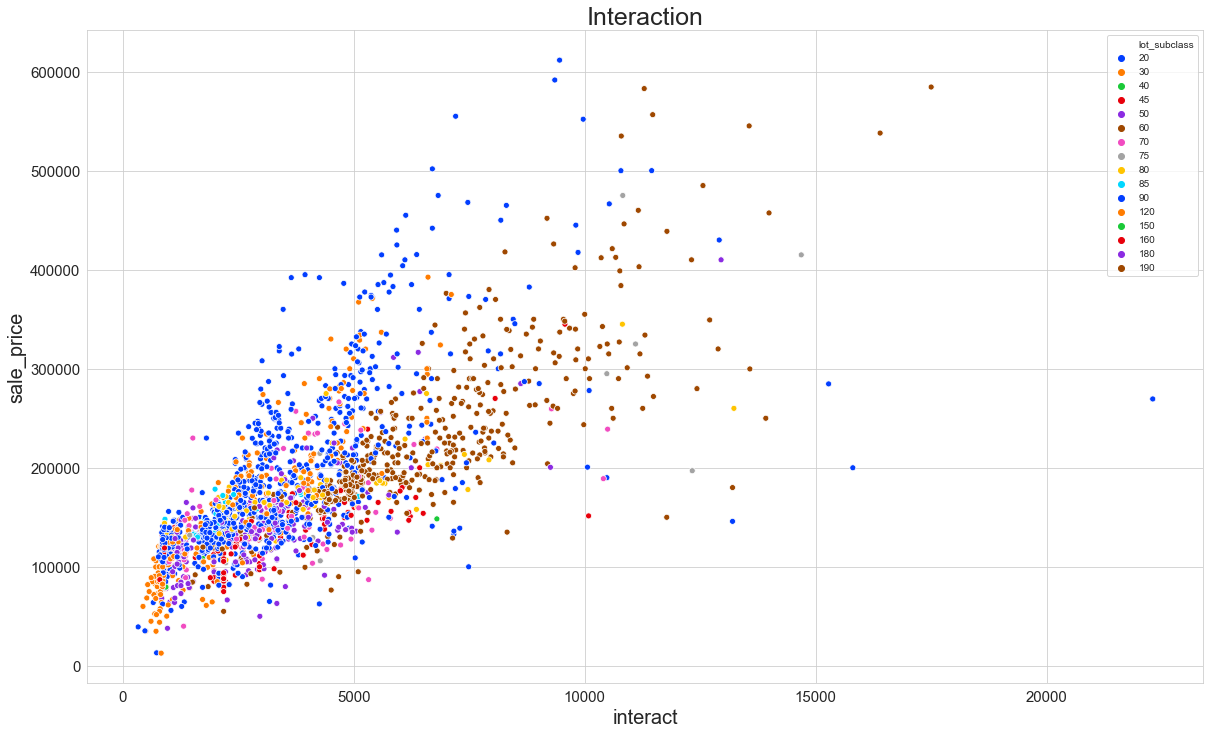

In [30]:
cols = ['bath_full_bsmt_num','bath_half_bsmt_num','bath_half_grd_num','bath_full_grd_num']

for col in cols:
    df_train[col] = pd.to_numeric(df_train[col])
    
df_train['tota_bath_num'] = df_train['bath_full_bsmt_num'] + df_train['bath_half_bsmt_num'] +  df_train['bath_half_grd_num'] + df_train['bath_full_grd_num'] 

df_train['interact'] = df_train['tota_bath_num'] * df_train['grd_total_area']

create_scatterplot('Interaction',df_train,x='interact',y='sale_price',hue='lot_subclass')

In [31]:
df_train['tota_bath_num'].describe()

count    2049.000000
mean        2.436310
std         0.938525
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: tota_bath_num, dtype: float64

Most subclasses has sale price between 100K to 200K.
4 subclasses have sale price above 200k and they have more outliers.
I will convert lot_subclass to dummy variables for model predictions.


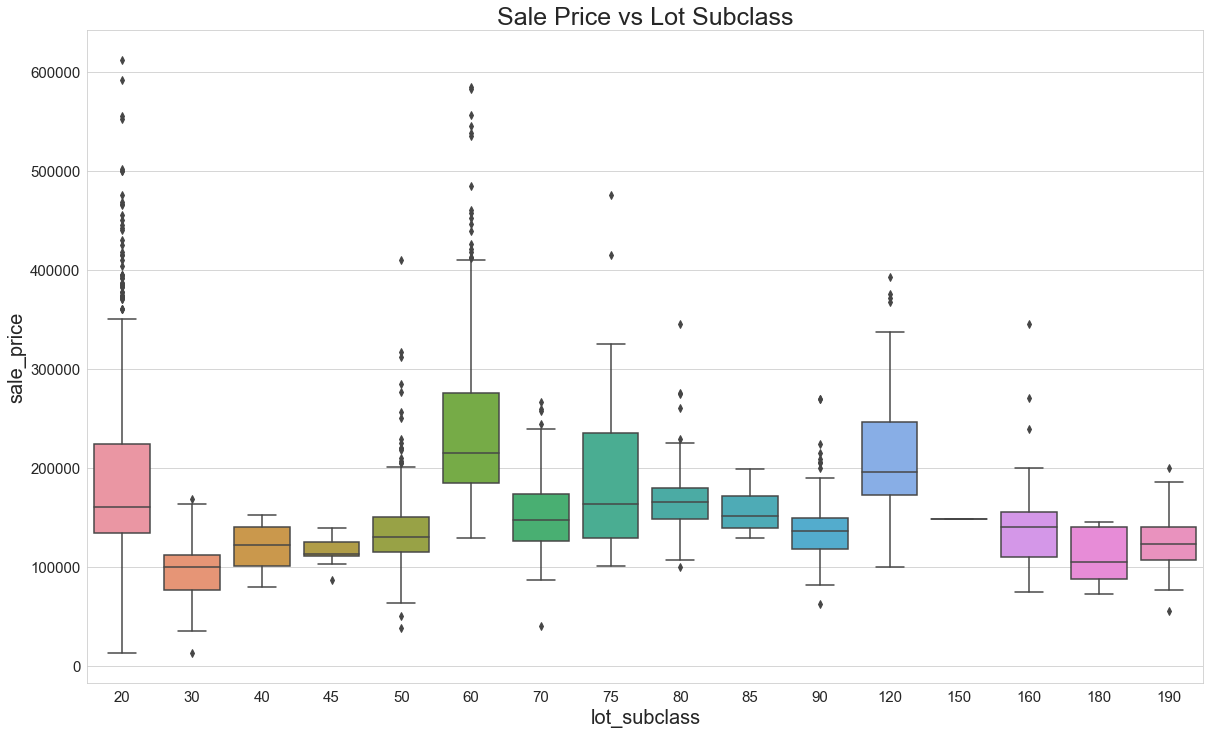

In [32]:
create_boxplot(df_train,x='lot_subclass',y='sale_price',title='Sale Price vs Lot Subclass')

print("Most subclasses has sale price between 100K to 200K.")
print("4 subclasses have sale price above 200k and they have more outliers.")
print("I will convert lot_subclass to dummy variables for model predictions.")

Lot Zone seems to affect Sale Price.
rl (Residential Low Density) and rm (Residential Medium Density) have outliers with high sale prices.
I will convert lot_zone to dummy variables for model predictions.


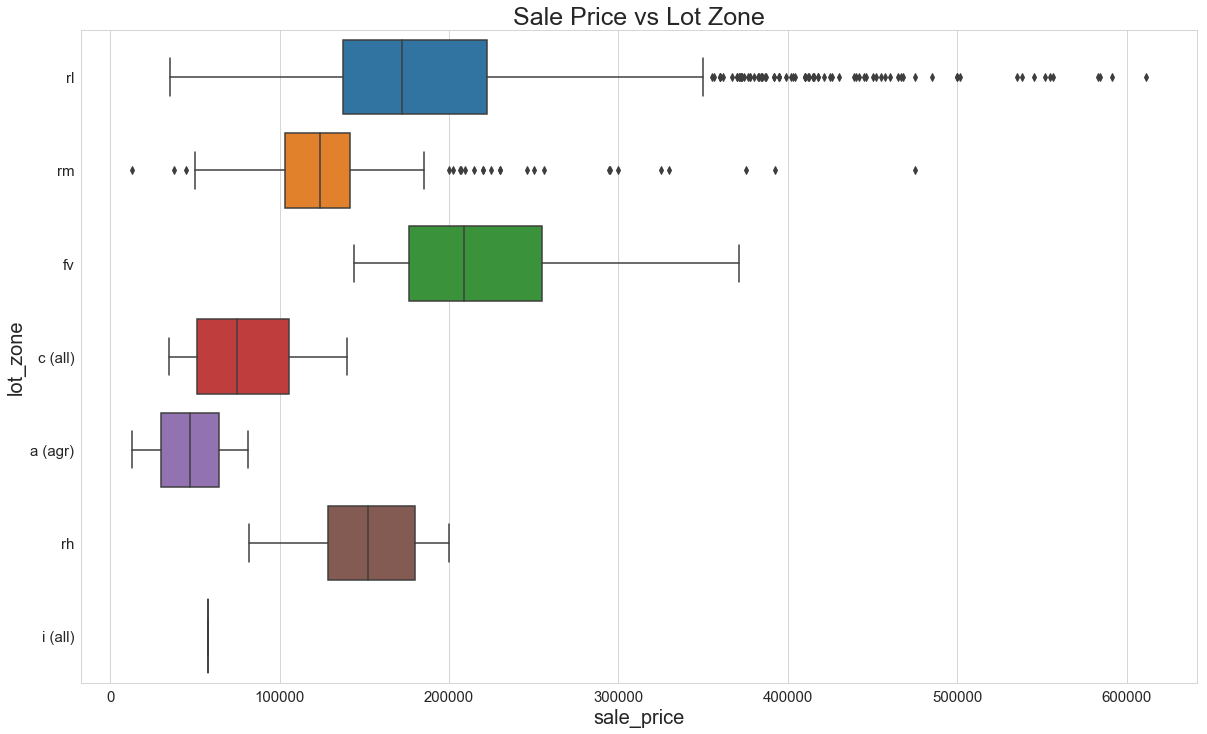

In [33]:
create_boxplot(df_train,x='sale_price',y='lot_zone',title='Sale Price vs Lot Zone')

print('Lot Zone seems to affect Sale Price.')
print('rl (Residential Low Density) and rm (Residential Medium Density) have outliers with high sale prices.')
print("I will convert lot_zone to dummy variables for model predictions.")

Most neighbourhoods have sale price between 100K to 250K
Stone Brook,Northridge Heights,Northridge have the highest sale prices.


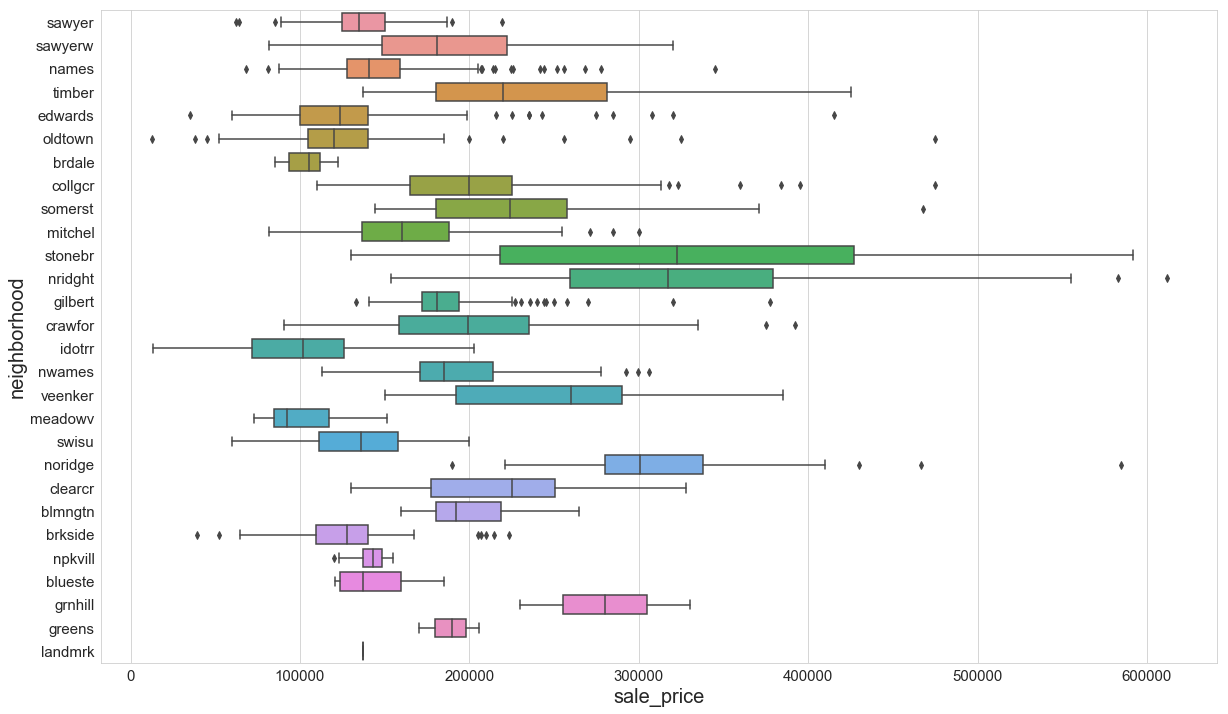

In [34]:
create_boxplot(df_train,x='sale_price',y='neighborhood')

print('Most neighbourhoods have sale price between 100K to 250K')
print('Stone Brook,Northridge Heights,Northridge have the highest sale prices.')

### Pre-Modelling

In [35]:
#init models
lr = LinearRegression()
#ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))
#lasso = LassoCV(n_alphas=200)

In [36]:
#init models

#lr = LinearRegression()

#r_alphas = np.logspace(0, 5, 200)
#ridge = RidgeCV(alphas=r_alphas)

#l_alphas = np.arange(0.001, 0.15, 0.0025)
#lasso = LassoCV(n_alphas=l_alphas)

### LR Model Exploratory

In [37]:
cols = ['house_qual']
lr_model_01 = create_lr_model(df_train,cols,cv=5)

coef: [44270.62578096] intercept: -89387.42447684277
score: 0.6477786291437233
cvs: 0.6444382937193531 [0.63621737 0.65436125 0.66964685 0.6448892  0.6170768 ]


In [38]:
cols = ['grd_total_area']
lr_model_02 = create_lr_model(df_train,cols,cv=5)

coef: [115.97165594] intercept: 7560.444694051635
score: 0.5206091024366111
cvs: 0.5155486704169734 [0.49805863 0.48079625 0.50204936 0.53872008 0.55811904]


In [39]:
cols = ['year_built']
lr_model_03 = create_lr_model(df_train,cols,cv=5)

coef: [1491.55655304] intercept: -2760071.740513484
score: 0.32091007600834687
cvs: 0.3274636656681917 [0.32328019 0.35308495 0.26083223 0.37859706 0.32152391]


In [40]:
cols = ['year_remodel']
lr_model_04 = create_lr_model(df_train,cols,cv=5)

coef: [2090.32155443] intercept: -3966559.2096247063
score: 0.2832283734867208
cvs: 0.3035502219653282 [0.25320325 0.33926255 0.28226149 0.34917944 0.29384438]


In [41]:
cols = ['year_built','year_remodel']
lr_model_05 = create_lr_model(df_train,cols,cv=5)

coef: [ 956.09987639 1213.7846709 ] intercept: -4112477.3421798656
score: 0.37617602929913485
cvs: 0.38818299156381864 [0.36447731 0.42319998 0.33697805 0.44300296 0.37325667]


In [42]:
cols = ['house_qual','grd_total_area']
lr_model_06 = create_lr_model(df_train,cols,cv=5)

coef: [32217.44163985    63.86893771] intercept: -111123.57644207982
score: 0.74026970981523
cvs: 0.7484478238032758 [0.724176   0.75615209 0.76553531 0.75813188 0.73824384]


In [43]:
cols = ['house_qual','year_remodel']
lr_model_07 = create_lr_model(df_train,cols,cv=5)

coef: [40027.44748886   487.97012802] intercept: -1031606.8402852641
score: 0.6556261275103868
cvs: 0.6543084920629026 [0.6470268  0.66596438 0.66909386 0.6586026  0.63085482]


In [44]:
df_train['interact_01'] = df_train['year_built'] * df_train['year_remodel']
cols = ['interact_01']
lr_model_interact_01 = create_lr_model(df_train,cols,cv=5)

coef: [0.53487608] intercept: -1911748.2700246535
score: 0.37750022055049726
cvs: 0.3887851199031435 [0.36889134 0.42245065 0.3351763  0.44312419 0.37428312]


### Create Feature Matrix and Target

In [45]:
# scale_cols: scale columns using StandardScaler
# dummy_cols: create dummies for these columns

mask_scale = df_cols['type'] == 'Scale'
mask_dummy = df_cols['type'] == 'Dummy'
mask_feature = df_cols['feature'] == 'Yes'

#scale_cols = df_cols['new_name'][mask_scale]
scale_cols = df_cols['new_name'][mask_scale & mask_feature]

#dummy_cols = df_cols['new_name'][mask_dummy]
dummy_cols = df_cols['new_name'][mask_dummy & mask_feature]

In [46]:
# dummy_cols: convert numeric columns to string (before get_dummies)
df_train[dummy_cols]= df_train[dummy_cols].astype(str)
df_test[dummy_cols]= df_test[dummy_cols].astype(str)

In [47]:
# convert selected columns to dummies

if len(dummy_cols) > 0:

    df_train_dummy = df_train[dummy_cols]
    df_train_dummy = pd.get_dummies(df_train_dummy,drop_first=False)

    df_test_dummy = df_test[dummy_cols]
    df_test_dummy = pd.get_dummies(df_test_dummy,drop_first=False)

In [48]:
# dummy columns could be missing in df_train or df_test
# need to add back to ensure the same shape for df_train and df_test

if len(dummy_cols) > 0:

    train_cols = set(df_train_dummy.columns)
    test_cols = set(df_test_dummy.columns)
    diff_cols = list(train_cols.difference(test_cols))

    print(diff_cols)
    print('before: ',df_train_dummy.shape,df_test_dummy.shape)

    for col in diff_cols:
        if col not in train_cols:            
            df_train_dummy[col] = 0
            print('create {} in df_train_dummy'.format(col))
        if col not in test_cols:
            df_test_dummy[col] = 0
            print('create {} in df_test_dummy'.format(col))

    print('after: ',df_train_dummy.shape,df_test_dummy.shape)

['roof_material_membran', 'heating_type_othw', 'heating_cond_po', 'exterior_type1_imstucc', 'neighborhood_grnhill', 'heating_type_wall', 'garage_qual_ex', 'lot_zone_a (agr)', 'pool_qual_fa', 'exterior_type2_stone', 'utilities_type_nosewa', 'exterior_type1_cblock', 'house_fn_sev', 'bsmt_cond_po', 'electrical_type_mix', 'lot_subclass_150', 'neighborhood_landmrk', 'pool_qual_gd', 'exterior_type1_stone', 'house_fn_sal', 'misc_feature_tenc', 'bsmt_cond_ex', 'house_qual_1']
before:  (2049, 284) (879, 271)
create roof_material_membran in df_test_dummy
create heating_type_othw in df_test_dummy
create heating_cond_po in df_test_dummy
create exterior_type1_imstucc in df_test_dummy
create neighborhood_grnhill in df_test_dummy
create heating_type_wall in df_test_dummy
create garage_qual_ex in df_test_dummy
create lot_zone_a (agr) in df_test_dummy
create pool_qual_fa in df_test_dummy
create exterior_type2_stone in df_test_dummy
create utilities_type_nosewa in df_test_dummy
create exterior_type1_cbl

In [49]:
# drop 1 dummy col for each dummy feature selected

num_col_before = df_train_dummy.shape[1]
print("before:",num_col_before)

for feature in dummy_cols:
    
    #print(feature)
    
    for col in df_train_dummy.columns:
        
        if feature in col:
            df_train_dummy.drop(columns=col,inplace=True)
            df_test_dummy.drop(columns=col,inplace=True)
            print("drop col:",col)
            break   

num_col_after = df_train_dummy.shape[1]
print("after:",num_col_after)
diff_num_col = num_col_before - num_col_after

if diff_num_col == len(dummy_cols):
    print('verified: correct number of dummy columns dropped')
else:
    print('error: number of dummy colmns dropped is different from number of dummy features')
    print(stop) # stop the notebook deliberately    

before: 284
drop col: lot_subclass_120
drop col: lot_zone_a (agr)
drop col: access_road_grvl
drop col: access_alley_grvl
drop col: lot_shape_ir1
drop col: land_contour_bnk
drop col: utilities_type_allpub
drop col: lot_config_corner
drop col: land_slope_gtl
drop col: neighborhood_blmngtn
drop col: house_type_1fam
drop col: house_style_1.5fin
drop col: house_qual_1
drop col: house_cond_1
drop col: roof_style_flat
drop col: roof_material_compshg
drop col: exterior_type1_asbshng
drop col: exterior_type2_asbshng
drop col: wall_type_brkcmn
drop col: exterior_qual_ex
drop col: exterior_cond_ex
drop col: foundation_type_brktil
drop col: bsmt_qual_ex
drop col: bsmt_cond_ex
drop col: bsmt_area_av
drop col: bsmt_type1_score_alq
drop col: bsmt_type2_score_alq
drop col: heating_type_gasa
drop col: heating_cond_ex
drop col: central_aircond_n
drop col: electrical_type_fusea
drop col: kitchen_qual_ex
drop col: house_fn_maj1
drop col: fireplace_score_ex
drop col: garage_type_2types
drop col: garage_fin

In [50]:
df_train_scale = df_train[scale_cols]
df_test_scale = df_test[scale_cols]

In [51]:
if len(dummy_cols) > 0:
    df_train_2 = pd.concat([df_train_scale,df_train_dummy],axis=1)
    df_test_2 = pd.concat([df_test_scale,df_test_dummy],axis=1)
    
else:
    df_train_2 = df_train_scale
    df_test_2 = df_test_scale

In [52]:
# create feature matrix (X) and target (Y) from df_train_2
X = df_train_2.values
y = df_train['sale_price'].values

# holdout method (training,validation,testing)
# X_test/y_test renamed to X_valid/y_valid to avoid confusion with df_test
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=3050)

# only scale columns in scale_cols
# do not scale columns in dummy cols
num_scale_cols = len(scale_cols)
print(num_scale_cols)

ss = StandardScaler()
ss.fit(X_train[:,0:num_scale_cols])

X_train = ss.transform(X_train[:,0:num_scale_cols])
X_valid = ss.transform(X_valid[:,0:num_scale_cols])

28


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [53]:
# create feature matrix (X2) from df_test_2           
X2 = df_test_2.values

X_test = ss.transform(X2[:,0:num_scale_cols])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [54]:
# check df_train transformations

if len(dummy_cols) > 0:
    print(df_train_dummy.shape)

print(df_train_scale.shape)
print(df_train_2.shape)
print(X.shape)
print(y.shape)

(2049, 241)
(2049, 28)
(2049, 269)
(2049, 269)
(2049,)


In [55]:
# check df_test transformations

if len(dummy_cols) > 0:
    print(df_test_dummy.shape)

print(df_test_scale.shape)
print(df_test_2.shape)
print(X2.shape)

(879, 251)
(879, 28)
(879, 279)
(879, 279)


### LR Model Polynomial

In [56]:
# use polynomial for df_train_scale
poly = PolynomialFeatures(2,include_bias=False)

X_poly = df_train_scale.values
y = df_train['sale_price'].values

X_poly = poly.fit_transform(X_poly)
cols = poly.get_feature_names(df_train_scale.columns)
df_poly = pd.DataFrame(X_poly,columns=cols)

df_poly['sale_price'] = y

In [57]:
# find correlations
df_poly_corr = df_poly.corr()
df_poly_corr.head()
df_poly_corr.to_csv('df_poly_corr.csv')

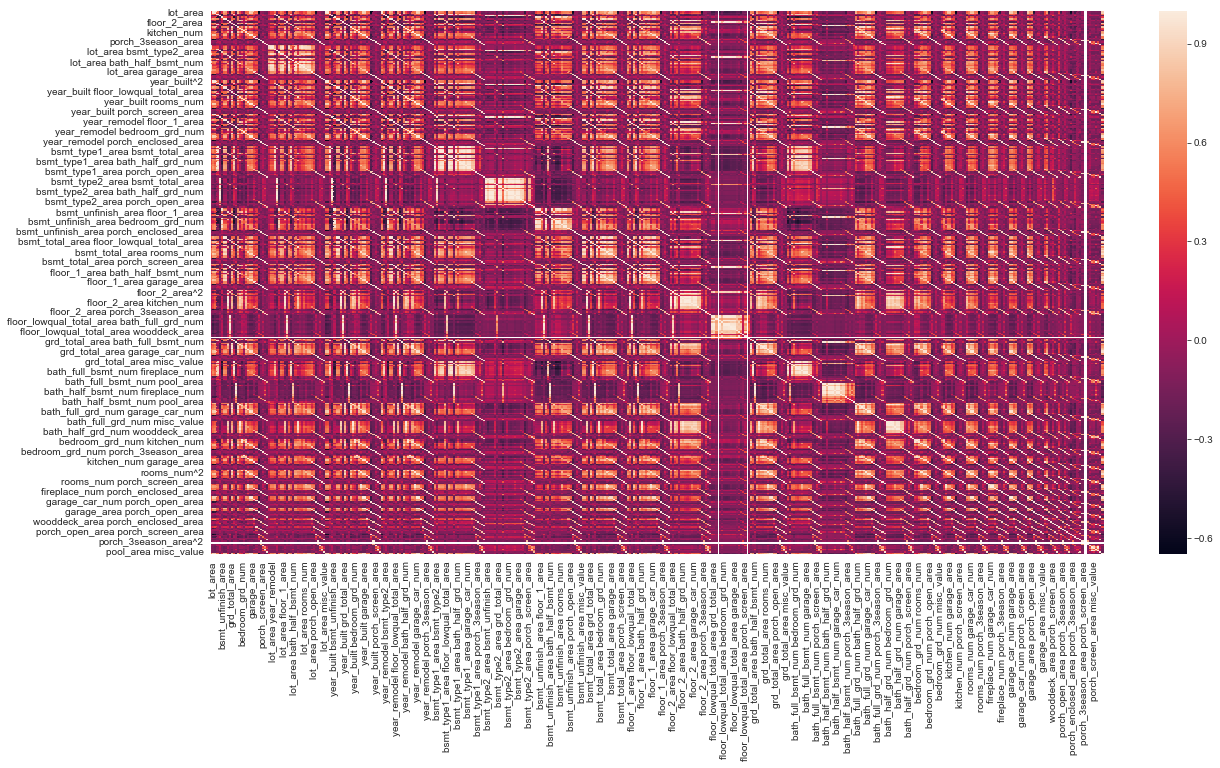

In [58]:
# heatmap for df_poly_corr
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df_poly_corr.corr())

In [59]:
# something wrong with scale, dummies, polies for lr model!!!

# # apply lr_model on X_train and X_test (df_train)
# lr_model = LinearRegression()

# lr_model_poly = lr.fit(X_train,y_train)
# #print('coef: {} intercept: {}'.format(lr_model_poly.coef_,lr_model_poly.intercept_))

# score = lr_model_poly.score(X_test,y_test)
# print('score:',score)

# # perform cross validation on lr_model
# mse = cross_val_score(lr_model_poly,X_poly,Y,cv=5,scoring='neg_mean_squared_error').mean()
# r2 = cross_val_score(lr_model_poly,X_poly,Y,cv=5,scoring='r2').mean()
# print('mse:',mse,'r2',r2)

# # apply lr_model on X_test_2 (df_test)
# lr_y_pred = lr_model_poly.predict(X_test_2)

### LR Model

In [60]:
#init model
lr = LinearRegression()

In [61]:
# perform cross validation
mse = cross_val_score(lr,X,y,cv=5,scoring='neg_mean_squared_error')
r2 = cross_val_score(lr,X,y,cv=5,scoring='r2')

print('mse:',mse.mean(),mse)
print('r2:',r2.mean(),r2)

mse: -549906998.5742208 [-6.46203328e+08 -4.79421428e+08 -4.70513171e+08 -5.71457043e+08
 -5.81940023e+08]
r2: 0.9120860853004483 [0.89735084 0.91996248 0.92675096 0.89987128 0.91649487]


In [62]:
# fit model

lr.fit(X_train, y_train)

# score model
print("train r2:",lr.score(X_train, y_train))
print("validation r2:",lr.score(X_valid, y_valid))

# validate model
y_pred = lr.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid,y_pred))
print("rmse:",rmse)

# model predictions
lr_pred = lr.predict(X_test)

train r2: 0.8389287083934722
validation r2: 0.8317395840615764
rmse: 32925.9944036195


### Ridge Model

In [63]:
# init model
#r_alphas = np.logspace(0, 5, 200)
#ridge = RidgeCV(alphas=ridge_optimal_alpha, store_cv_values=True)

ridge_optimal_alpha = 30.36771118035459
ridge = Ridge(alpha=ridge_optimal_alpha)

In [64]:
# perform cross validation
mse = cross_val_score(ridge,X,y,cv=5,scoring='neg_mean_squared_error')
r2 = cross_val_score(ridge,X,y,cv=5,scoring='r2')

print('mse:',mse.mean(),mse)
print('r2:',r2.mean(),r2)

mse: -557392840.4998971 [-6.10968123e+08 -5.05796291e+08 -5.21695761e+08 -5.36098604e+08
 -6.12405423e+08]
r2: 0.9110960117163595 [0.90294794 0.9155593  0.9187829  0.90606666 0.91212326]


In [65]:
# fit model
ridge.fit(X_train, y_train)

# score model
print("train r2:",ridge.score(X_train, y_train))
print("validation r2:",ridge.score(X_valid, y_valid))

# validate model
y_pred = ridge.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid,y_pred))
print("rmse:",rmse)

# model predictions
ridge_pred = ridge.predict(X_test)

train r2: 0.8387101051204371
validation r2: 0.8316745517038584
rmse: 32932.35670867049


In [66]:
#ridge_optimal_alpha = ridge.alpha_
#ridge_optimal_alpha

### Lasso Model

In [67]:
# init model
#l_alphas = np.arange(0.001, 0.15, 0.0025)
#lasso = LassoCV(alphas=lasso_optimal_alpha, cv=5)

lasso_optimal_alpha = 0.1485
lasso = Lasso(alpha=lasso_optimal_alpha)

In [68]:
# perform cross validation
mse = cross_val_score(lasso,X,y,cv=5,scoring='neg_mean_squared_error')
r2 = cross_val_score(lasso,X,y,cv=5,scoring='r2')

print('mse:',mse.mean(),mse)
print('r2:',r2.mean(),r2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

mse: -550960719.2105435 [-6.41596318e+08 -4.72065568e+08 -4.69061748e+08 -5.82716844e+08
 -5.89363119e+08]
r2: 0.9119156321020687 [0.89808266 0.92119051 0.92697691 0.89789837 0.9154297 ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [69]:
# fit model
lasso.fit(X_train, y_train)

# score model
print("train r2:",lasso.score(X_train, y_train))
print("validation r2:",lasso.score(X_valid, y_valid))

# validate model
y_pred = lasso.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid,y_pred))
print("rmse:",rmse)

# model predictions
lasso_pred = lasso.predict(X_test)

train r2: 0.8389327113934322
validation r2: 0.8317699342825486
rmse: 32923.024732269805


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [70]:
#lasso_optimal_alpha = lasso.alpha_
#lasso_optimal_alpha

### Output Model Predictions

In [71]:
# output to csv

if output_predictions_flag == True:

    output_path = '../data/output/'

    timestamp = dt.datetime.now()
    timestamp = timestamp.strftime(" %Y_%m_%d %H_%M_%S ")

    df_lr = pd.DataFrame(df_test,columns=['id'])
    df_ridge = pd.DataFrame(df_test,columns=['id'])
    df_lasso = pd.DataFrame(df_test,columns=['id'])
    
    df_lr['SalePrice'] = lr_pred
    df_ridge['SalePrice'] = ridge_pred
    df_lasso['SalePrice'] = lasso_pred

    df_lr.sort_values(by='id',inplace=True)
    df_ridge.sort_values(by='id',inplace=True)
    df_lasso.sort_values(by='id',inplace=True)

    df_lr.to_csv(output_path + 'submission' + timestamp + 'lr.csv',index=False)
    df_ridge.to_csv(output_path + 'submission' + timestamp + 'ridge.csv',index=False)
    df_lasso.to_csv(output_path + 'submission' + timestamp + 'lasso.csv',index=False)
    
    # contains selected columns for feature matrix
    df_cols.to_csv(output_path + 'columns' + timestamp + '.csv')

### Descriptive and Inferential Statistics

In [126]:
cols = ['lot_zone','lot_subclass','sale_price']
df_lot = df_train[cols].sort_values(by='lot_zone')

In [131]:
cols = ['lot_zone','lot_subclass']
df_lot.groupby(cols).mean()

new_name                  sale_price
lot_zone lot_subclass               
a (agr)  20             47300.000000
c (all)  190           117300.000000
         20             77101.333333
         30             63437.833333
         50             84446.000000
         70             64500.000000
fv       120           225766.666667
         160           169776.500000
         20            232060.840000
         60            251584.967742
i (all)  30             57625.000000
rh       120           183000.000000
         160           137000.000000
         190           162666.666667
         20             94500.000000
         50            159434.000000
         70            116800.000000
         90            145000.000000
rl       120           213698.741176
         150           148400.000000
         160           159768.750000
         190           131205.769231
         20            190699.098611
         30            101058.775510
         40            122500.000000
         45            118066.666667
         50            145373.688073
         60            238386.240331
         70            177419.952381
         75            247625.000000
         80            169696.488095
         85            154398.214286
         90            137749.615385
rm       120           202732.285714
         160           107248.780488
         180           109672.727273
         190           105621.666667
         20            115388.235294
         30             93298.644444
         40            115750.000000
         45            115737.500000
         50            130092.902439
         70            136083.250000
         75            190625.000000
         80            164250.000000
         90            149833.333333

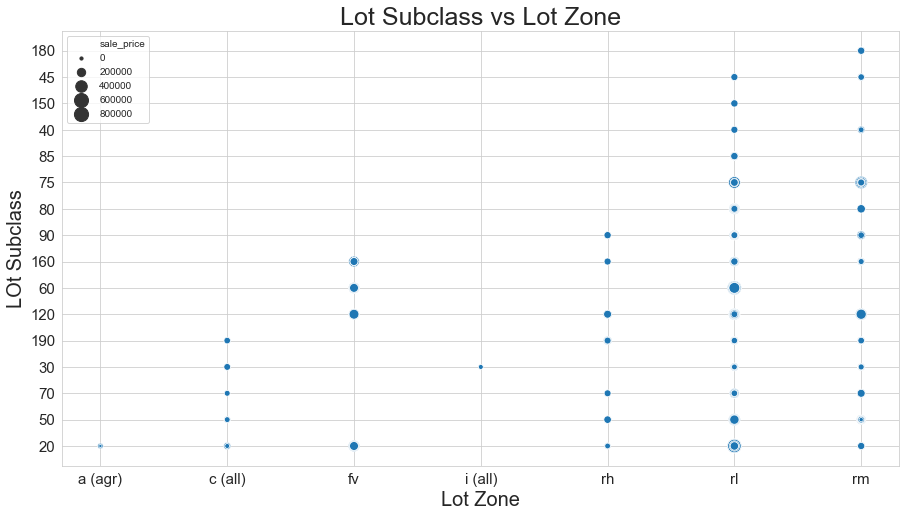

In [128]:
# plot scatterplot
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_lot,x='lot_zone',y='lot_subclass',size='sale_price',sizes=(10,200))

plt.title('Lot Subclass vs Lot Zone',fontsize=25)
plt.xlabel('Lot Zone',fontsize=20)
plt.ylabel('LOt Subclass',fontsize=20)
plt.tick_params(labelsize=15)

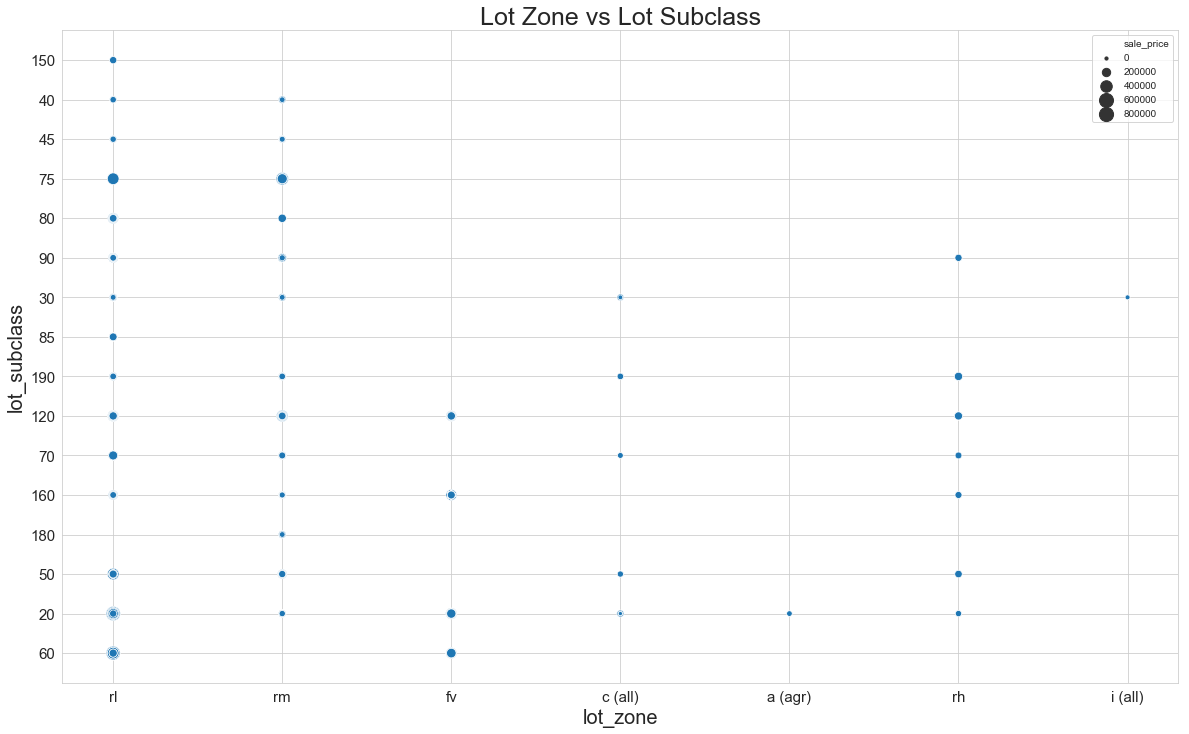

In [89]:
create_scatterplot('Lot Zone vs Lot Subclass',df_train,x='lot_zone',y='lot_subclass',size='sale_price')

### Outside Research

### Conclusions and Recommendations